# Test Sentiment Classification
### On Amazon-Review, Full Heterogeneous Graph

In [3]:
import numpy as np
from Scripts.Configs.ConfigClass import Config
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
from lightning.pytorch.loggers import CSVLogger
import os
from Scripts.DataManager.GraphLoader.AmazonReviewGraphDataModule import AmazonReviewGraphDataModule
import time
import torch

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [5]:
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence')
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = 'cuda'
batch_size = 16

In [18]:
# tag_dep_seq_sent = TextGraphType.TAGS | TextGraphType.DEPENDENCY | TextGraphType.SEQUENTIAL | TextGraphType.SENTENCE | TextGraphType.SENTIMENT
tag_dep_seq_sent = TextGraphType.SENTIMENT
data_manager = AmazonReviewGraphDataModule(config, True, True, shuffle=False, start_data_load=0 , end_data_load = -1, device='cpu', batch_size=batch_size, graph_type=tag_dep_seq_sent, load_preprocessed_data = True)
data_manager.load_labels()
data_manager.load_graphs()

filename: C:\Users\fardin\Projects\ColorIntelligence\data/GraphData/AmazonReview\sentiment\graph_var.txt


 Loding Graphs From File : 100%|██████████| 110/110 [20:07<00:00, 10.98s/it]

self.shuffle: False


In [7]:
# data_manager.update_batch_size(128)
t_dataloader = data_manager.train_dataloader()
v_dataloader = data_manager.val_dataloader()
X1, y1 = next(iter(t_dataloader))
X2, y2 = next(iter(v_dataloader))
# X1.metadata()
len(X1)

16

In [8]:
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding1 import HeteroDeepGraphEmbedding1

In [9]:
from Scripts.Models.LightningModels.LightningModels import HeteroBinaryLightningModel
from Scripts.Models.LossFunctions.HeteroLossFunctions import HeteroLossArgs, HeteroLoss1, HeteroLoss2
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [10]:
graph_embedding = HeteroDeepGraphEmbedding1(300, 1, X1.metadata(), 128, dropout=0.2, edge_type_count=11)
graph_embedding = graph_embedding.to(device)

In [11]:

callbacks = [
    ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
    ]
lightning_model = HeteroBinaryLightningModel(graph_embedding,
                                 torch.optim.Adam(graph_embedding.parameters(), lr=0.003, weight_decay=0.001),
                                       loss_func=HeteroLoss1(exception_keys=['word'], enc_factor=0.03),
                                       learning_rate=0.003,
                                       batch_size=batch_size,
                                       user_lr_scheduler=True,
                                       min_lr=0.00005
                                       ).to(device)
model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_6', model_save_dir=r'C:\Users\fardin\Projects\ColorIntelligence\Practices\Tasks\HeterogeneousGraphs\hetero_model_3',device=device, num_train_epoch=50)

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
X1.metadata()

(['dep', 'tag', 'word', 'sentence', 'general', 'sentiment'],
 [('dep', 'dep_word', 'word'),
  ('word', 'word_dep', 'dep'),
  ('tag', 'tag_word', 'word'),
  ('word', 'word_tag', 'tag'),
  ('word', 'seq', 'word'),
  ('general', 'general_sentence', 'sentence'),
  ('sentence', 'sentence_general', 'general'),
  ('word', 'word_sentence', 'sentence'),
  ('sentence', 'sentence_word', 'word'),
  ('word', 'word_sentiment', 'sentiment'),
  ('sentiment', 'sentiment_word', 'word')])

In [16]:
def print_sentiment_edges(X):
    print(X.edge_index_dict[('word', 'word_sentiment', 'sentiment')].dtype)

In [19]:
t_dataloader = data_manager.train_dataloader()
v_dataloader = data_manager.val_dataloader()
for X, y in t_dataloader:
    print_sentiment_edges(X)
    
for X, y in v_dataloader:
    print_sentiment_edges(X)

torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torch.int64
torc

KeyError: ('word', 'word_sentiment', 'sentiment')

In [15]:
model_manager.fit(datamodule=data_manager)

You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params
--------------------------------------------------------
0 | model     | HeteroDeepGraphEmbedding1 | 2.2 M 
1 | loss_func | HeteroLoss1               | 0     
2 | train_acc | BinaryAccuracy            | 0     
3 | val_acc   | BinaryAccuracy            | 0     
4 | test_acc  | BinaryAccuracy            | 0     
--------------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.829     Total estimated model params size (MB)


bbbb


c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of training batches (37) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\call.py:58: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
model_manager.draw_summary(t_dataloader)

+------------------------------------------------------------+--------------------------------+----------------------------+-----------+
| Layer                                                      | Input Shape                    | Output Shape               | #Param    |
|------------------------------------------------------------+--------------------------------+----------------------------+-----------|
| HeteroDeepGraphEmbedding1                                  | [3442, 3442]                   | [16, 1]                    | 2,207,246 |
| ├─(part_weight_norm)LayerNorm                              | [11]                           | [11]                       | 22        |
| ├─(norm)PairNorm                                           | --                             | --                         | --        |
| ├─(drop)Dropout                                            | --                             | --                         | --        |
| ├─(hetero_linear_1)GraphModule         

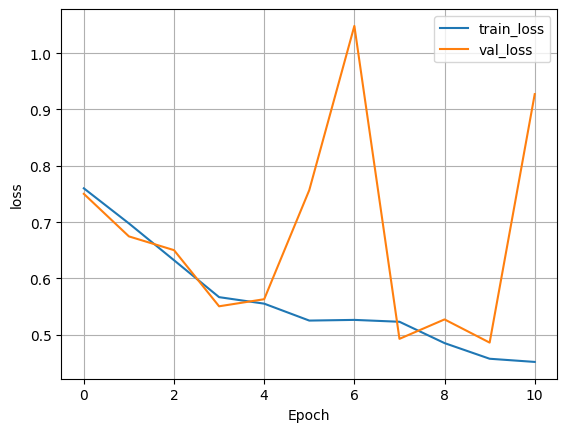

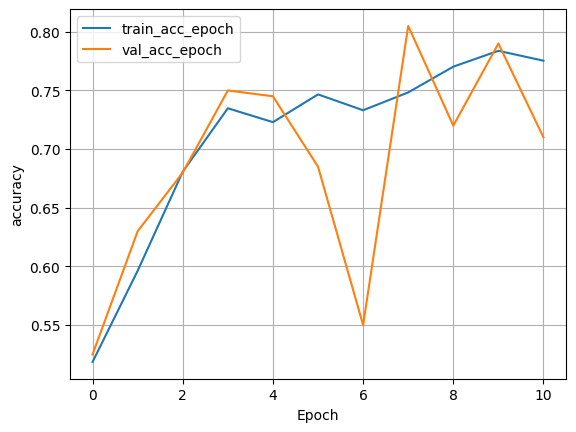

In [ ]:
model_manager.plot_csv_logger(loss_names=['train_loss', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc_epoch'])

In [ ]:
model_manager.evaluate(data_manager.test_dataloader(), give_accuracy_score=True, give_hinge_loss=True)

confusion_matrix: 
[[43 84]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.93      0.34      0.50       127
           1       0.45      0.96      0.62        73

    accuracy                           0.56       200
   macro avg       0.69      0.65      0.56       200
weighted avg       0.76      0.56      0.54       200

accuracy_score: 0.565
hinge_loss: 1.07


In [ ]:
model_manager.trainer.checkpoint_callback.best_model_path

'logs/hetero_model_6\\version_11\\checkpoints\\epoch=7-step=296.ckpt'